# Quantile Regression Explained: Modeling the Full Conditional Distribution

## 1. The Core Problem with Mean Regression

Most regression models (Linear Regression, Ridge, Lasso, even many ML models) answer one question:

- What is the expected (mean) value of y∣x?

Formally:

`𝐸[𝑦∣𝑥]`

This is often not what decision-makers actually care about.

Examples:

- Risk management → worst-case outcomes
- Pricing → upper revenue bounds
- Operations → service-level guarantees
- Finance → Value-at-Risk

All of these are quantile questions, not mean questions.

## 2. What Is Quantile Regression?

Quantile Regression (QR) estimates conditional quantiles of the response variable:

𝑄𝜏(𝑦∣𝑥)

Where:

- τ∈(0,1) is the quantile level
    - τ=0.5 → median
    - τ=0.9 → 90th percentile
    - τ=0.1 → 10th percentile

Instead of modeling the center of the distribution, QR models its shape.

## 3. Why Mean Regression Fails in Asymmetric Data

Mean regression implicitly assumes:

- Symmetric errors
- Homoscedasticity (constant variance)
- Squared-error loss is appropriate

But real-world data often has:

- Skewness
- Heavy tails
- Heteroskedasticity

Quantile Regression does not require these assumptions.

## 4. How Quantile Regression Works (Key Insight)

Quantile Regression replaces squared loss with asymmetric absolute loss, known as the pinball loss.

**Pinball (Quantile) Loss**

For residual 𝑢=𝑦−𝑦:

𝜌𝜏(𝑢) = 

𝜏𝑢, 𝑢 ≥ 0
(𝜏−1)𝑢, 𝑢 < 0


Interpretation:

- Over-prediction and under-prediction are penalized unequally
- The asymmetry forces predictions toward the desired quantile

Special case:

- 𝜏 = 0.5 → median regression → absolute loss

## 5. Quantile Regression Optimization Problem

For linear quantile regression:

Compare:
| Method              | Loss                | Targe        |
| ------------------- | ------------------- | ------------ |
| Linear Regression   | ( (y - \hat{y})^2 ) | Mean         |
| LAD Regression      | (                   | y - \hat{y}  |
| Quantile Regression | Pinball loss        | Any quantile |

This is solved via linear programming, not closed-form equations.

## 6. Interpreting Quantile Regression Coefficients (Subtle but Critical)

In mean regression:

“A one-unit increase in x increases the expected 𝑦 by 𝛽.”

In quantile regression:

“A one-unit increase in x shifts the τ-th quantile of 𝑦 by 𝛽𝜏.”

That means:

- Coefficients vary across quantiles
- Effect sizes can differ between low-risk and high-risk regimes

This is not noise — it’s structural information.

## 7. Quantile Regression vs Distributional Models

Quantile Regression:

- Models quantiles directly
- No full distribution assumption
- Robust to outliers

Distributional models (e.g., Gaussian, Gamma):

- Assume a parametric distribution
- Often wrong in practice
- More efficient if assumptions hold

Trade-off:

QR is robust but less statistically efficient under perfect assumptions.

## 8. Visual Interpretation (Why QR Is Powerful)

When you plot multiple quantiles (e.g., 0.1, 0.5, 0.9), you get:

- A fan chart
- Direct visualization of uncertainty
- Detection of heteroskedasticity without modeling variance explicitly

This is something mean regression simply cannot show.

## 9. Strengths and Weaknesses
Strengths

- Robust to outliers
- Captures distributional asymmetry
- Works under heteroskedasticity
- Directly answers risk questions

Weaknesses

- No closed-form solution
- Harder to interpret for non-technical stakeholders
- Independent quantiles may cross (quantile crossing problem)
- Less efficient if Gaussian assumptions truly hold

## 10. When Should You Use Quantile Regression?

Use it when:

- You care about tails, not averages
- Risk or service guarantees matter
- Data is skewed or heavy-tailed
- Variance depends on features

Avoid it when:

- Mean prediction is the sole objective
- Distribution is well-known and symmetric
- You need extremely fast large-scale inference

# Quantile Regression: Step-by-Step Walkthrough with Equations

## 1. Problem Setup

You are given a dataset:

$$
\{(x_i, y_i)\}_{i=1}^n
$$

where:
- $x_i \in \mathbb{R}^p$ are features  
- $y_i \in \mathbb{R}$ is a continuous response  

**Goal:**

Estimate the conditional quantile

$$
Q_\tau(y \mid x)
$$

for a given quantile level

$$
\tau \in (0,1)
$$

This is fundamentally different from estimating:

$$
\mathbb{E}[y \mid x]
$$

---

## 2. What Is a Conditional Quantile?

The $\tau$-th conditional quantile is defined as:

$$
Q_\tau(y \mid x)
=
\inf \left\{
y : P(Y \le y \mid X = x) \ge \tau
\right\}
$$

**Interpretation:**
- $\tau = 0.5$ → median  
- $\tau = 0.9$ → upper tail (risk, worst-case)  
- $\tau = 0.1$ → lower tail  

Quantile regression models **different parts of the conditional distribution**, not just its center.

---

## 3. Linear Quantile Regression Model

Assume a linear structure:

$$
Q_\tau(y \mid x) = x^\top \beta_\tau
$$

Important:
- Each quantile has its **own coefficient vector** $\beta_\tau$
- There is **no assumption** that coefficients are equal across quantiles

---

## 4. Why Squared Loss Does Not Work

Mean regression solves:

$$
\min_\beta \sum_{i=1}^n (y_i - x_i^\top \beta)^2
$$

This objective:
- Penalizes over- and under-prediction symmetrically
- Forces the solution toward the **conditional mean**

To estimate quantiles, we need **asymmetric penalties**.

---

## 5. Pinball (Quantile) Loss Function

Define the residual:

$$
u_i = y_i - x_i^\top \beta
$$

Quantile (pinball) loss:

$$
\rho_\tau(u) =
\begin{cases}
\tau u, & u \ge 0 \\
(\tau - 1)u, & u < 0
\end{cases}
$$

**Key intuition:**
- Under-prediction is penalized more when $\tau$ is large
- Over-prediction is penalized more when $\tau$ is small

**Special case:**

$$
\tau = 0.5 \;\Rightarrow\; \rho_{0.5}(u) = |u|
$$

Median regression = Least Absolute Deviations (LAD).

---

## 6. Quantile Regression Optimization Problem

The quantile regression estimator solves:

$$
\hat{\beta}_\tau
=
\arg\min_{\beta}
\sum_{i=1}^n
\rho_\tau(y_i - x_i^\top \beta)
$$

This optimization problem is:
- Convex
- Piecewise linear
- Solved via **linear programming**

No closed-form solution exists.

---

## 7. Why the Solution Corresponds to a Quantile

At the optimum, the solution satisfies approximately:

$$
P(y_i \le x_i^\top \hat{\beta}_\tau \mid x_i) \approx \tau
$$

**Intuition:**
- Roughly $\tau \times 100\%$ of observations lie **below** the fitted line
- $(1-\tau) \times 100\%$ lie above

This property **defines** a quantile.

---

## 8. Multiple Quantiles = Distributional View

Estimate a set of quantiles:

$$
\tau \in \{0.1, 0.5, 0.9\}
$$

You obtain:

$$
x^\top \beta_{0.1}, \quad
x^\top \beta_{0.5}, \quad
x^\top \beta_{0.9}
$$

This forms a **conditional distribution envelope**:
- Width → heteroskedasticity
- Asymmetry → skewness
- Non-parallel lines → varying effects across risk levels

Mean regression cannot reveal this structure.

---

## 9. Interpretation of Coefficients (Often Misstated)

For feature $x_j$, the coefficient

$$
\beta_{\tau, j}
$$

means:

> A one-unit increase in $x_j$ shifts the $\tau$-th conditional quantile of $y$ by $\beta_{\tau, j}$, holding other variables fixed.

This is **not**:
- An average effect
- A probability statement

Each quantile answers a **different economic or risk question**.

---

## 10. Quantile Crossing (A Real Problem)

Because quantiles are estimated independently:

$$
Q_{0.9}(y \mid x) < Q_{0.5}(y \mid x)
$$

can occur, violating probability logic.

Common fixes:
- Constrained optimization
- Rearrangement methods
- Joint quantile modeling

Ignoring this can silently break downstream decisions.

---

## 11. Comparison to Mean Regression

| Aspect | Mean Regression | Quantile Regression |
|------|----------------|--------------------|
| Target | $\mathbb{E}[y \mid x]$ | $Q_\tau(y \mid x)$ |
| Loss | Squared error | Pinball loss |
| Robust to outliers | ❌ | ✅ |
| Handles heteroskedasticity | ❌ | ✅ |
| Tail modeling | ❌ | ✅ |


# Linear Quantile Regression (statsmodels)

Quantile 0.1
[0.88181811 1.24968934]

Quantile 0.5
[1.68589508 1.59478309]

Quantile 0.9
[2.26567753 2.03627866]



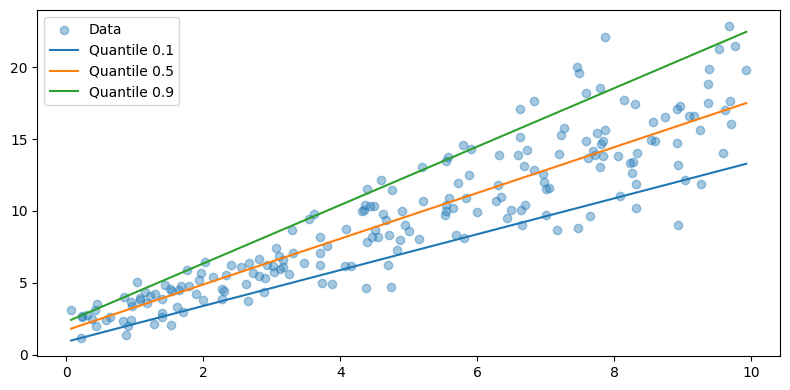

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Generate Toy Data (Heteroskedastic by Design)
rng = np.random.default_rng(42)

n = 200
X = rng.uniform(0, 10, size=n)
noise = rng.normal(0, 0.5 + 0.3 * X, size=n)  # heteroskedastic noise
y = 2 + 1.5 * X + noise

## Prepare Design Matrix
X_design = sm.add_constant(X)  # adds intercept

## Fit Quantile Regression Models
quantiles = [0.1, 0.5, 0.9]
models = {}

for q in quantiles:
    mod = sm.QuantReg(y, X_design)
    res = mod.fit(q=q)
    models[q] = res

## Inspect Coefficients
for q, res in models.items():
    print(f"Quantile {q}")
    print(res.params)
    print()

## Each quantile has different coefficients → this is the signal, not noise.

## Predict and Plot

X_grid = np.linspace(X.min(), X.max(), 200)
X_grid_design = sm.add_constant(X_grid)

plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.4, label="Data")

for q, res in models.items():
    y_pred = res.predict(X_grid_design)
    plt.plot(X_grid, y_pred, label=f"Quantile {q}")

plt.legend()
plt.tight_layout()
plt.show()


## Non-Linear Quantile Regression (Gradient Boosting)

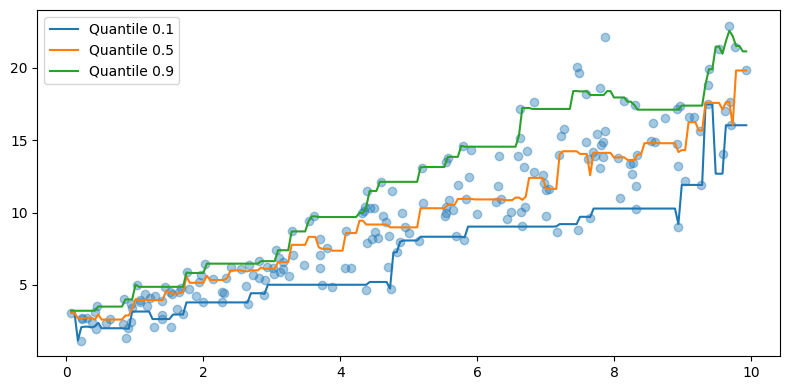

In [3]:
from sklearn.ensemble import GradientBoostingRegressor

## Fit Quantile Gradient Boosting
gb_models = {}

for q in [0.1, 0.5, 0.9]:
    gb = GradientBoostingRegressor(
        loss="quantile",
        alpha=q,
        n_estimators=200,
        max_depth=3,
        learning_rate=0.05,
        random_state=42
    )
    gb.fit(X.reshape(-1, 1), y)
    gb_models[q] = gb

## Predict and Plot
plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.4)

for q, model in gb_models.items():
    y_pred = model.predict(X_grid.reshape(-1, 1))
    plt.plot(X_grid, y_pred, label=f"Quantile {q}")

plt.legend()
plt.tight_layout()
plt.show()

## Critical Pitfalls (Most Tutorials Ignore These)

###  Quantile Crossing

In [4]:
# Independent estimation can cause:
# Detection check:
y_q10 = gb_models[0.1].predict(X_grid.reshape(-1, 1))
y_q50 = gb_models[0.5].predict(X_grid.reshape(-1, 1))
y_q90 = gb_models[0.9].predict(X_grid.reshape(-1, 1))

print("Crossing exists:", np.any(y_q10 > y_q50) or np.any(y_q50 > y_q90))

Crossing exists: True


**Interpreting coefficients like mean regression**

Wrong:

“Feature X increases Y by β”

Correct:

“Feature X shifts the τ-th conditional quantile of Y by β”

**Expecting probabilistic calibration**

Quantile regression:

- Gives conditional quantiles
- Does not give full predictive distributions

### When to Use Which Implementation

| Use Case         | Method                     |
| ---------------- | -------------------------- |
| Interpretability | Linear Quantile Regression |
| Non-linearity    | Gradient Boosting          |
| Large datasets   | Tree-based QR              |
| Causal analysis  | Linear QR                  |
| Prediction only  | Boosting QR                |
